In [1]:
import numpy as np
import sympy as sm
from scipy.sparse import diags
import scipy.sparse as sp
sm.init_printing()
N = 5
import matplotlib.pyplot as plt
plt.ion()

# Hyperparameters

In [2]:
N = 5
h = 1 /N

# Domain

ValueError: unexpected '{' in field name

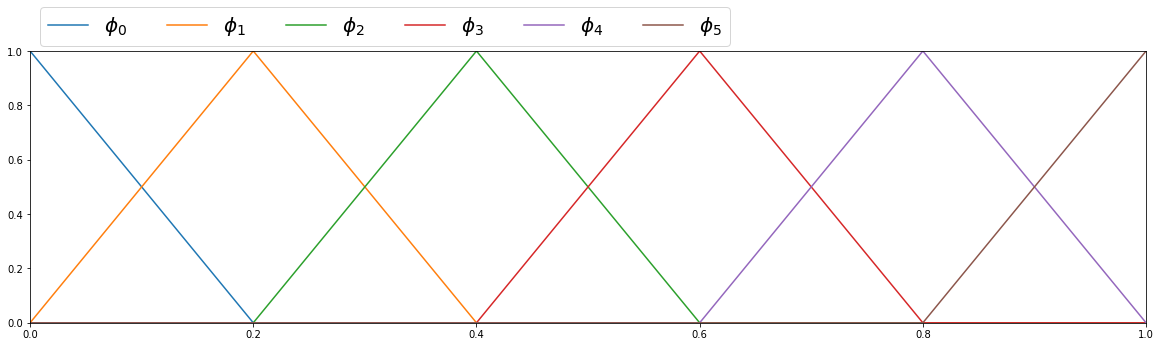

In [3]:
l = []

for i in range(N + 1):
    arr = np.array([0]* (N + 1))
    arr[i] = 1
    l.extend([np.linspace(0, 1, N+1), arr])
plt.figure(figsize=(20, 5))      
plt.margins(x=0, y=0)
plt.plot(*l)
plt.ion()
plt.legend([r"$\phi_{}$".format(i) for i in range(N+1)],loc = 2, prop={'size': 20}, ncol=8,  bbox_to_anchor=(0, 1.2 ))
for i in range(N):
    ann = plt.annotate(r'$ y = \frac {-(x-{0}h)}{h}$'.format(i), xy =(i *h, 1 -h), xytext=(0, 1-h))
    ann.set_fontsize(20)

## Equations 

\begin{equation}
\underline {System \ of \ equations :}
\\\ u_t + u  u_x + v_x + \beta u_{xx} = 0 
\\ v_t + (uv)_x - \beta v_{xx} = 0 
\end{equation}

\begin{equation}
\underline { Discrete \ Galerkin \ Solution :}
\\ u^h = 
\sum_{i= 0}^{n} a_i  \phi_i 
\end{equation}

\begin{equation}
\underline {System \ of \ equations :}
\\\ \int_0^1 { (w u_t + wu  u_x + wv_x + \beta w u_{xx})} \ dx= 0 
\\ \int_0^1 { (wv_t + w (uv)_x - \beta w v_{xx})} \ dx= 0 
\end{equation}



# Trial Case

\begin{equation}
\underline {System \ of \ equations :  Heat \ Equation }
\\\ \int {( w u_t  + \beta w u_{xx})} \ dx = 0 
\end{equation}


\begin{equation}
\underline {System \ of \ equations :}
\\\ \int_0^1  w u_t  \ dx  + \beta \ (w(1) u_x(1) - w(0) u_x(0)) - \beta \int_0^1 {w_x u_x} \ dx= 0 
\\  A \alpha \hspace{30mm} B \alpha \hspace{20mm} C \alpha \hspace{20mm} D \alpha
\\ w = {\phi_j}
\end{equation}

# Matrices are written without constants multiplied such as \beta

## A   integrate

In [ ]:
sm.Matrix([[sm.Symbol(f"phi_{i}")* sm.Symbol(f"phi_{j}") \
            if abs(i-j) in [0, 1]  else 0 for j in range(N+1) ] for i in range(N+1)]) # A

## B   C !!do not integrate    calculate at points 0 1

In [ ]:
sm.Matrix([[sm.Symbol(f"phi_{i}^'")* sm.Symbol(f"phi_{j}")\
            if abs(i-j) in [0, 1]  else 0 for j in range(N+1)] for i in range(N+1)]) # B  C

## D  integrate

In [ ]:
sm.Matrix([[sm.Symbol(f"phi_{i}^'")* sm.Symbol(f"phi_{j}^'")\
            if abs(i-j) in [0, 1]  else 0 for j in range(N+1)] for i in range(N+1)]) # D

In [ ]:
x, n, k = sm.symbols("x n k")
h = 1/n

In [ ]:
#No of basis functions
N = 5

h = 1/N

beta = .5


A = sp.csc_matrix(diags([[h/3, *[2*h/3]*(N-1), h/3], [h/6]*(N), [h/6]*(N)], [0, 1, -1] ))

B = sp.csc_matrix(diags([[-.5, *[0]*(N-1), .5], [.5]*(N), [-.5]*(N)], [0, -1, 1]))
C = sp.csc_matrix(diags([[1/h, *[2/h]*(N-1), 1/h], [-1/h]*(N), [-1/h]*(N)], [0, -1, 1]))
D = np.zeros(np.shape(C))
D[0, 0] =1/h%% d_[ij}=p_ip_j'{a,b}]
D[1, 0] = -1/h

D[N, N] = 1/h
D[N - 1, N] = -1/h

D = sp.csc_matrix(D)


alpha = np.array([np.sin((x+1)*np.pi/2) - np.cos((x+1)*np.pi/2)   for x in np.linspace(0, 1, 6) ])


In [ ]:
D.toarray()

In [ ]:
alpha

In [ ]:
I8 = (beta * D)
I4 = (-beta * C)
 

In [ ]:
I8.toarray()

In [ ]:
step_size = h**2 #for time
import scipy.sparse.linalg as la

def f(y):
    A_=A(2:N,2:N)

    return -la.inv(A_)*(I4 + I8)*y

In [ ]:

runs = 10
t=0
y = alpha
for i in range(runs):
    k1 = f( y)
    k2 = f( y+.5*k1*h)
    k3 = f(y+.5*k2*h)
    k4 = f( y+k3*h)
    y_new = y + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*step_size
    y = y_new
    t=t+h^2

In [ ]:
y

In [ ]:
import scipy.sparse.linalg as la

def rk4(n=1, k = h**2):
    
    global A, I4, I8, alpha
    for i in range(n):
        m = la.inv(A)
        
        k11 = -k* m.dot( I8 + I4)
        
        alpha_new = alpha + k11/2
        
        
        renew(alpha_new)
        
        k21 = k*(-m.dot( I8 + I4))
    
        alpha_new = alpha + k21/2
        
        renew(alpha_new)
        
        k31 = k*(-m.dot( I8 + I4) )
        
        alpha_new = alpha + k31
        
        renew(alpha_new)
        
        k41 = k*(-m.dot( I8 + I4) )
        
        alpha = alpha + (1/6)*(k11 + 2*k21 + 2*k31 + k41)

        renew(alpha)
        
        

        
rk4()

In [ ]:
alpha

In [ ]:
u_real = []
l = .005
k = 1.5

t = h**2
for i in [j*h for j in range(N+1)]:
    u_real += [l - k * beta *1/np.tanh(k*(i+x0) - l * t)]


In [ ]:
u_real

In [ ]:
v_real

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(u_real,"bo",alpha,"ro")